In [61]:
"""Batch & Stochastic training"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Stochastic Training

In [62]:
learning_rate = .02
display_step = 5
epochs = 100

In [63]:
"""Generating random data"""

x_vals = np.random.normal(1, .1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(tf.float32, shape=[1])
y_target = tf.placeholder(tf.float32, shape=[1])

# We create the one variable in the graph, A. 
# We then create the model operation, which is just the multiplication of the input data and A.
A = tf.Variable(tf.random_normal(shape=[1]))

# model operation
output = tf.multiply(x_data, A)

# Loss function
l2_loss = tf.square(tf.subtract(output, y_target))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(l2_loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    loss_stochastic = []
    for i in range(epochs):
        random_choice = np.random.choice(100)
        sess.run(optimizer, feed_dict={x_data: [x_vals[random_choice]], y_target: [y_vals[random_choice]]})

        if (i + 1) % display_step == 0:
            loss = sess.run(l2_loss, feed_dict={x_data: [x_vals[random_choice]], y_target: [y_vals[random_choice]]})
            print('Epoch %d ' % (i + 1), 'A is ' + str(sess.run(A)), 'Stochastic Loss is ' + str(loss))
            loss_stochastic.append(loss)


Epoch 5  A is [ 1.75787425] Stochastic Loss is [ 66.46611786]
Epoch 10  A is [ 3.3104248] Stochastic Loss is [ 50.34594345]
Epoch 15  A is [ 4.57982016] Stochastic Loss is [ 20.42941666]
Epoch 20  A is [ 5.561553] Stochastic Loss is [ 11.19017506]
Epoch 25  A is [ 6.3538866] Stochastic Loss is [ 12.29871464]
Epoch 30  A is [ 7.03160238] Stochastic Loss is [ 4.94850063]
Epoch 35  A is [ 7.5162673] Stochastic Loss is [ 3.48030543]
Epoch 40  A is [ 7.94060421] Stochastic Loss is [ 1.58730495]
Epoch 45  A is [ 8.33858299] Stochastic Loss is [ 3.94920945]
Epoch 50  A is [ 8.72607517] Stochastic Loss is [ 9.49859619]
Epoch 55  A is [ 9.00095844] Stochastic Loss is [ 1.40506244]
Epoch 60  A is [ 9.11885548] Stochastic Loss is [ 0.52472293]
Epoch 65  A is [ 9.39101028] Stochastic Loss is [ 1.73480904]
Epoch 70  A is [ 9.44807529] Stochastic Loss is [ 0.0125409]
Epoch 75  A is [ 9.64836502] Stochastic Loss is [ 2.77275205]
Epoch 80  A is [ 9.7068615] Stochastic Loss is [ 0.83843482]
Epoch 85  A

Batch Training

In [64]:
"""For Batch training, we need to declare our batch size. 
The larger the batch size, the smoother the convergence will be towards the optimal value. 
But if the batch size is too large, the optimization algorithm may get stuck in a local minimum, 
where a more stochastic convergence may jump out.

Here, the we may change the batch size from 1 to 100 to see the effects of the batch size on the convergence plots at the end."""

# declaring the batch size
batch_size = 25

# Generating random data
x_vals = np.random.normal(1, .1, 100)
y_vals = np.repeat(10., 100)

# where the batch size will take the place of the None dimension.
x_place_holder = tf.placeholder(tf.float32, shape=[None, 1])
y_place_holder = tf.placeholder(tf.float32, shape=[None, 1])

# variable
A = tf.Variable(tf.random_normal(shape=[1, 1]))

# output
output = tf.matmul(x_place_holder, A)

# loss function
l2_loss = tf.reduce_mean(tf.square(tf.subtract(output, y_place_holder)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(l2_loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    loss_batch = []
    for i in range(epochs):
        random_choice = np.random.choice(100, size=batch_size)
        sess.run(optimizer, feed_dict={x_place_holder: np.transpose([x_vals[random_choice]]),
                                       y_place_holder: np.transpose([y_vals[random_choice]])})

        if (i + 1) % display_step == 0:
            loss = sess.run(l2_loss, feed_dict={x_place_holder: np.transpose([x_vals[random_choice]]),
                                                y_place_holder: np.transpose([y_vals[random_choice]])})
            print('Epoch %d ' % (i + 1), 'A is ' + str(sess.run(A)), 'Batch Loss is ' + str(loss))
            loss_batch.append(loss)


Epoch 5  A is [[ 2.23400688]] Batch Loss is 59.5929
Epoch 10  A is [[ 3.66117859]] Batch Loss is 40.4046
Epoch 15  A is [[ 4.82681322]] Batch Loss is 26.4647
Epoch 20  A is [[ 5.77285862]] Batch Loss is 17.7913
Epoch 25  A is [[ 6.53858948]] Batch Loss is 11.9428
Epoch 30  A is [[ 7.15583754]] Batch Loss is 7.85658
Epoch 35  A is [[ 7.67578888]] Batch Loss is 5.67585
Epoch 40  A is [[ 8.06619453]] Batch Loss is 3.22623
Epoch 45  A is [[ 8.38919353]] Batch Loss is 2.52347
Epoch 50  A is [[ 8.66345501]] Batch Loss is 2.49159
Epoch 55  A is [[ 8.88293076]] Batch Loss is 1.63458
Epoch 60  A is [[ 9.08016396]] Batch Loss is 1.21986
Epoch 65  A is [[ 9.22535515]] Batch Loss is 0.778411
Epoch 70  A is [[ 9.31166744]] Batch Loss is 0.642071
Epoch 75  A is [[ 9.40529823]] Batch Loss is 0.997735
Epoch 80  A is [[ 9.47474861]] Batch Loss is 0.890459
Epoch 85  A is [[ 9.55140972]] Batch Loss is 0.546268
Epoch 90  A is [[ 9.60163784]] Batch Loss is 0.735949
Epoch 95  A is [[ 9.65854359]] Batch Loss

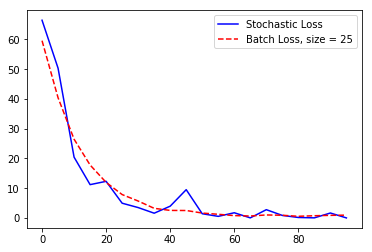

In [65]:
# plotting graph
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size = 25')
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

print('all done!')
